## Importing the Libraries

In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Loading the Data

In [3]:
mnist_df = pd.read_csv('D:/BIA Data Science & AI/ML/mnist.csv')

In [7]:
mnist_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [9]:
# Split dataset into features and labels

features = mnist_df.drop('label', axis = 1)
labels = mnist_df['label']

In [11]:
features = features / 255.0

In [15]:
features = np.array(features)
labels = np.array(labels)

In [17]:
features.shape

(42000, 784)

In [19]:
features = features.reshape(-1, 28, 28)

In [21]:
features.shape

(42000, 28, 28)

In [23]:
labels = labels.reshape(-1)

In [25]:
labels.shape

(42000,)

## Building ANN Model

In [28]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape = (28, 28)),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dropout(0, 2),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

C:\Users\watad\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training the Model

In [67]:
model.fit(features, labels, epochs = 5)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9970 - loss: 0.0087
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0053
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9977 - loss: 0.0066
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9983 - loss: 0.0052
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9980 - loss: 0.0069


## Making Predictions with the Model

In [70]:
predictions = model.predict(features)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Vizualizing the Results

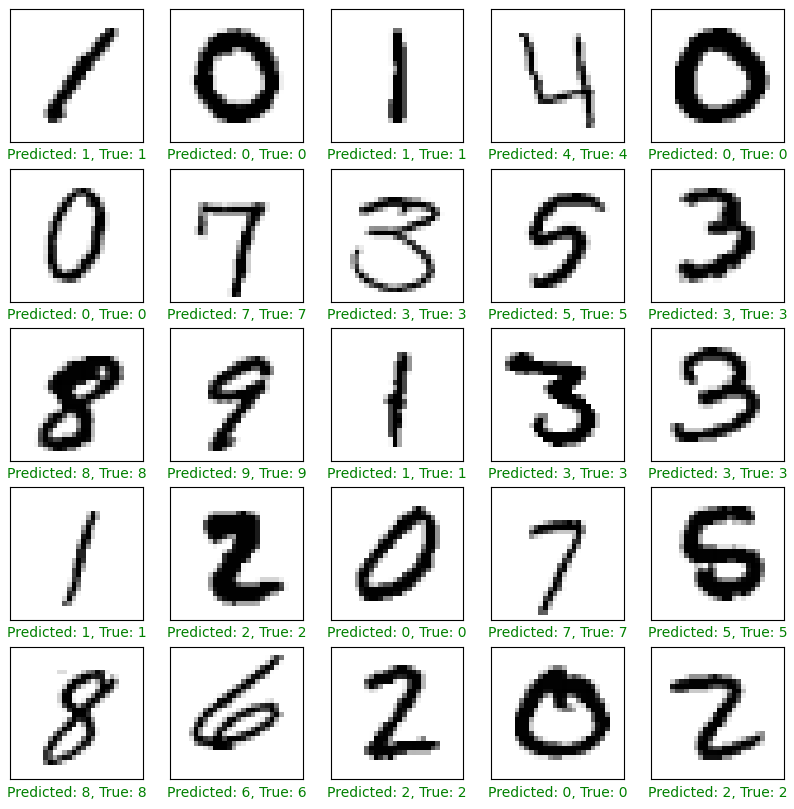

In [73]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i], cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color = color)
plt.show()